<a href="https://colab.research.google.com/github/Mpr9640/CNN/blob/main/its_me_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


# Read the train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Splitting the train set into new train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
  train_images, train_labels, train_size=0.5, random_state=42)

In [ ]:
print("train",train_images.shape)
print("val",val_images.shape)
print("test",test_images.shape)

train (30000, 28, 28)
val (30000, 28, 28)
test (10000, 28, 28)


In [ ]:
#for modelA;
number_of_classes=len(class_names)
model_A = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', strides=2),
    tf.keras.layers.Conv2D(120, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')
])

# Calculate the total number of parameters in model_A
model_A_params = model_A.count_params()
print("Number of parameters in model_A:", model_A_params)

Number of parameters in model_A: 89266


In [ ]:
tf.keras.utils.plot_model(model_A,show_shapes=True)

In [ ]:
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=number_of_classes)
val_labels_one_hot=tf.keras.utils.to_categorical(val_labels,num_classes=number_of_classes)
test_labels_one_hot=tf.keras.utils.to_categorical(test_labels,num_classes=number_of_classes)

In [ ]:
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

In [ ]:
#learnign process before training
model_A.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model_A.fit(
    train_images,
    train_labels_one_hot,
    epochs=5,
    verbose=True,
    validation_data=(val_images, val_labels_one_hot)
)


Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.2554 - accuracy: 0.9068 - val_loss: 0.2316 - val_accuracy: 0.9114
Epoch 2/5
938/938 [==============================] - 19s 20ms/step - loss: 0.2378 - accuracy: 0.9115 - val_loss: 0.2291 - val_accuracy: 0.9131
Epoch 3/5
938/938 [==============================] - 19s 21ms/step - loss: 0.2220 - accuracy: 0.9177 - val_loss: 0.2421 - val_accuracy: 0.9088
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.2111 - accuracy: 0.9219 - val_loss: 0.2460 - val_accuracy: 0.9095
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.2046 - accuracy: 0.9235 - val_loss: 0.2449 - val_accuracy: 0.9100


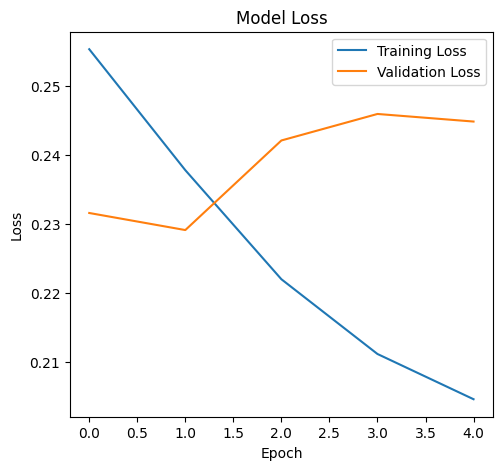

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

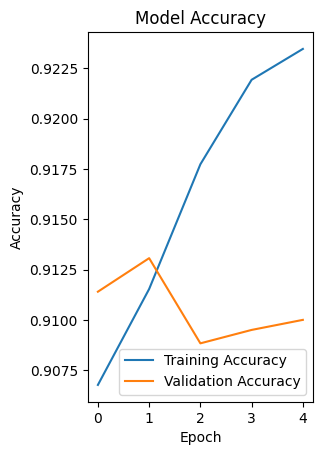

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
full_train_images = np.concatenate((train_images, val_images))
full_train_labels_one_hot = np.concatenate((train_labels_one_hot, val_labels_one_hot))

history = model_A.fit(
    full_train_images,
    full_train_labels_one_hot,
    epochs=5,
    verbose=True
    # Note: We are not using a validation set here since we are training on the full dataset
)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2391 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2251 - accuracy: 0.9168
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2145 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2053 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1975 - accuracy: 0.9264


In [ ]:
model_B = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(36, activation='relu'),  #hidden layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')
])

# Check if the number of parameters in model_B is approximately the same as model_A
model_B_params = model_B.count_params()
print("Number of parameters in model_B:", model_B_params)


Number of parameters in model_B: 89366


In [ ]:
model_B.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model_B.fit(
    train_images,
    train_labels_one_hot,
    epochs=5,
    verbose=True,
    validation_data=(val_images, val_labels_one_hot)
)

Epoch 1/5
938/938 [==============================] - 47s 49ms/step - loss: 0.8897 - accuracy: 0.6774 - val_loss: 0.4552 - val_accuracy: 0.8383
Epoch 2/5
938/938 [==============================] - 42s 44ms/step - loss: 0.6140 - accuracy: 0.7753 - val_loss: 0.4013 - val_accuracy: 0.8557
Epoch 3/5
938/938 [==============================] - 40s 43ms/step - loss: 0.5396 - accuracy: 0.8025 - val_loss: 0.3644 - val_accuracy: 0.8682
Epoch 4/5
938/938 [==============================] - 42s 45ms/step - loss: 0.4808 - accuracy: 0.8221 - val_loss: 0.3418 - val_accuracy: 0.8758
Epoch 5/5
938/938 [==============================] - 40s 43ms/step - loss: 0.4493 - accuracy: 0.8335 - val_loss: 0.3339 - val_accuracy: 0.8819


In [ ]:
history = model_B.fit(
    full_train_images,
    full_train_labels_one_hot,
    epochs=5,
    verbose=True
    # Note: We are not using a validation set here since we are training on the full dataset
)

Epoch 1/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.7571 - accuracy: 0.7250
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.5062 - accuracy: 0.8172
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4500 - accuracy: 0.8380
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4087 - accuracy: 0.8515
Epoch 5/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.3734 - accuracy: 0.8630


In [ ]:
loss, accuracy = model_A.evaluate(test_images, test_labels_one_hot)
print(f"Test accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.3094 - accuracy: 0.8879
Test accuracy: 88.79%


In [ ]:
loss, accuracy = model_B.evaluate(test_images, test_labels_one_hot)
print(f"Test accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 4s 12ms/step - loss: 0.3543 - accuracy: 0.8745
Test accuracy: 87.45%


In [ ]:
number_of_classes=len(class_names)
model_C = tf.keras.Sequential([ # (To check for 1*1 convolution layer)
    tf.keras.layers.Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(28, 28, 1), strides=2),
    tf.keras.layers.Conv2D(64, (1, 1), activation='relu', strides=2),
    tf.keras.layers.Conv2D(120, (1, 1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(1, 1), strides=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')
])

# Calculate the total number of parameters in model_A
model_C_params = model_C.count_params()
print("Number of parameters in model_A:", model_C_params)

Number of parameters in model_A: 29186


In [ ]:
model_C.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model_C.fit(
    full_train_images,
    full_train_labels_one_hot,
    epochs=5,
    verbose=True
    # Note: We are not using a validation set here since we are training on the full dataset
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 21s 10ms/step - loss: 1.0122 - accuracy: 0.6119
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.9373 - accuracy: 0.6348
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.9265 - accuracy: 0.6390
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.9195 - accuracy: 0.6423
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.9162 - accuracy: 0.6425


In [ ]:
loss, accuracy = model_C.evaluate(test_images, test_labels_one_hot)
print(f"Test accuracy: {accuracy*100:.2f}%")

 15/313 [>.............................] - ETA: 1s - loss: 0.8713 - accuracy: 0.6750 

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 1s 3ms/step - loss: 0.9304 - accuracy: 0.6430
Test accuracy: 64.30%
